# Q1

In [257]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

φ = 0.5
d = 0.02
θ = -0.3
T = 3000
dt = 1


mu = 0  # mean
sigma = 1   # standard deviation
N = round(T/dt)

epsilon = np.random.normal(mu, sigma, N)     # Gaussian random variables



p = np.zeros(T)
p[0] = 1000
p[1] = 1000

for t in range(2,3000):
    p[t] = φ*p[t-1] - φ*p[t-2] - φ*d + epsilon[t] + θ*epsilon[t-1] + d + p[t-1]
    
print(np.size(p))
print(p)

3000
[1000.         1000.         1001.12937583 ... 1015.35737776 1014.86541018
 1016.65643712]


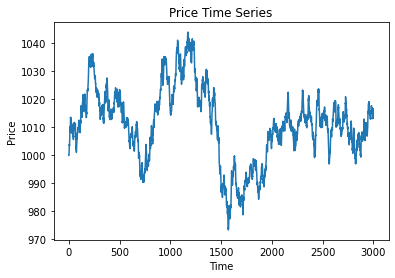

In [258]:
plt.plot(p)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Price Time Series")
plt.show()

In [259]:
# split a dataset into train and test sets

train, test = p[0:len(p)-900], p[len(p)-900:]

In [260]:
import pandas as pd                     

train = pd.DataFrame(train)
train

,0
0,1000.000000
1,1000.000000
2,1001.129376
3,1003.383606
4,1003.947051
...,...
2095,1005.526612
2096,1006.377174
2097,1006.888879
2098,1008.487033


In [261]:
test = pd.DataFrame(test)
test

,0
0,1010.120423
1,1008.924844
2,1009.371691
3,1009.648151
4,1009.867009
...,...
895,1013.106771
896,1013.430375
897,1015.357378
898,1014.865410


# Q2

### trend following strategy

In [262]:
#TREND FOLLOWING

time_window = 5*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(p))

V_tf = np.zeros(np.shape(p))
C_tf = np.zeros(np.shape(p))

C_tf[0] = 10000

for i, x in enumerate(p[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        V_tf[i+1] = V_tf[i]
        C_tf[i+1] = C_tf[i]
    
    if ma[i] < x: 
        V_tf[i+1] = C_tf[i]/x  + V_tf[i]
        C_tf[i+1] = 0
        
    if ma[i] > x:
        C_tf[i+1] = V_tf[i]*x + C_tf[i]
        V_tf[i+1] = 0

ma[i+1] = p[len(p)-1]


print('values of C(t):', C_tf)
print('values of V(t):', V_tf)
        
TV_tf = [a*b for a,b in zip(V_tf,p)]+ C_tf

values of C(t): [10000.         10000.         10000.         ... 12453.33941874
     0.             0.        ]
values of V(t): [ 0.          0.          0.         ...  0.         12.26498147
 12.26498147]


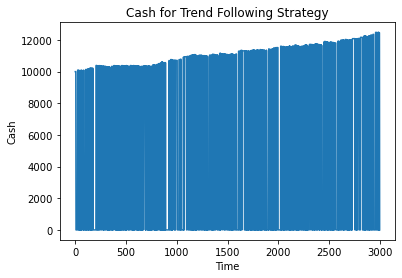

In [263]:
plt.plot(C_tf)
plt.title('Cash for Trend Following Strategy')
plt.xlabel('Time')
plt.ylabel('Cash')
plt.show()

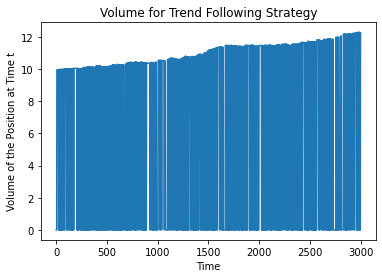

In [264]:
plt.plot(V_tf)
plt.title('Volume for Trend Following Strategy')
plt.xlabel('Time')
plt.ylabel('Volume of the Position at Time t')
plt.show()

### mean reversion strategy

In [265]:
#MEAN REVERSION 
    
time_window = 5*int(1/dt)
cumsum = [0]

ma = np.zeros(np.shape(p))

V_mr = np.zeros(np.shape(p))
C_mr = np.zeros(np.shape(p))

C_mr[0] = 10000

for i, x in enumerate(p[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        V_mr[i+1] = V_mr[i]
        C_mr[i+1] = C_mr[i]
    
    if ma[i] > x: 
        V_mr[i+1] = C_mr[i]/x  + V_mr[i]
        C_mr[i+1] = 0
        
    if ma[i] < x:
        C_mr[i+1] = V_mr[i]*x + C_mr[i]
        V_mr[i+1] = 0

ma[i+1] = p[len(p)-1]


print('values of C(t):', C_mr)
print('values of V(t):', V_mr)

TV_mr = [a*b for a,b in zip(V_mr,p)]+ C_mr

values of C(t): [10000.         10000.         10000.         ...     0.
  8123.60485977  8123.60485977]
values of V(t): [0.         0.         0.         ... 8.00073456 0.         0.        ]


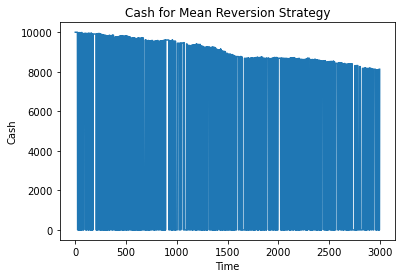

In [266]:
plt.plot(C_mr)
plt.title('Cash for Mean Reversion Strategy')
plt.xlabel('Time')
plt.ylabel('Cash')
plt.show()

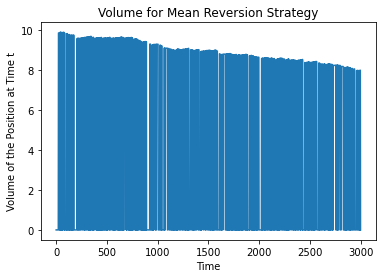

In [267]:
plt.plot(V_mr)
plt.title('Volume for Mean Reversion Strategy')
plt.xlabel('Time')
plt.ylabel('Volume of the Position at Time t')
plt.show()

### AR strategy

In [268]:
#AR  
from statsmodels.tsa.ar_model import AutoReg as AR

time_window = 5*int(1/dt)
cumsum = [0]

ar_prediction = np.zeros(np.shape(p))

V_ar = np.zeros(np.shape(p))
C_ar = np.zeros(np.shape(p))

C_ar[0] = 10000

for i, x in enumerate(p[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ar_prediction[i] = x
    if i>=time_window:
        X = p[0:i]
        train = X
        # train autoregression
        model = AR(train, 1)
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(train), end=len(train), dynamic=False)
        ar_prediction[i] = predictions[0]
    
    if ar_prediction[i] == x:
        V_ar[i+1] = V_ar[i]
        C_ar[i+1] = C_ar[i]
    
    if ar_prediction[i] > x: 
        V_ar[i+1] = C_ar[i]/x  + V_ar[i]
        C_ar[i+1] = 0
        
    if ar_prediction[i] < x:
        C_ar[i+1] = V_ar[i]*x + C_ar[i]
        V_ar[i+1] = 0

ma[i+1] = p[len(p)-1]


print('values of C(t):', C_ar)
print('values of V(t):', V_ar)

TV_ar = [a*b for a,b in zip(V_ar,p)]+ C_ar

values of C(t): [10000.         10000.         10000.         ...  7783.21073519
  7783.21073519     0.        ]
values of V(t): [0.         0.         0.         ... 0.         0.         7.66920486]


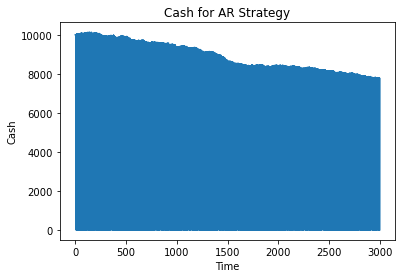

In [269]:
plt.plot(C_ar)
plt.title('Cash for AR Strategy')
plt.xlabel('Time')
plt.ylabel('Cash')
plt.show()

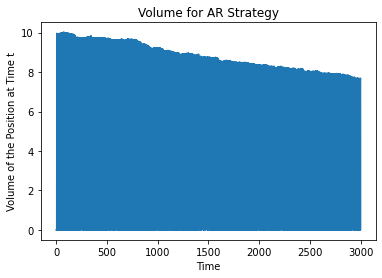

In [270]:
plt.plot(V_ar)
plt.title('Volume for AR Strategy')
plt.xlabel('Time')
plt.ylabel('Volume of the Position at Time t')
plt.show()

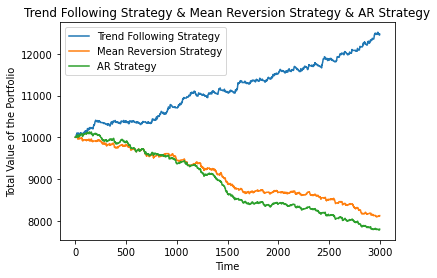

In [271]:
plt.plot(TV_tf)
plt.plot(TV_mr)
plt.plot(TV_ar)
plt.title('Trend Following Strategy & Mean Reversion Strategy & AR Strategy')
plt.xlabel('Time')
plt.ylabel('Total Value of the Portfolio')
plt.legend(['Trend Following Strategy', 'Mean Reversion Strategy', 'AR Strategy'])
plt.show()

# Q3

#### trend following

In [272]:
#trend following

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

%precision %.2f
return_a_tf = TV_tf[1:] / TV_tf[:-1] - 1
return_a_tf

array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
       -0.00048453,  0.00176479])

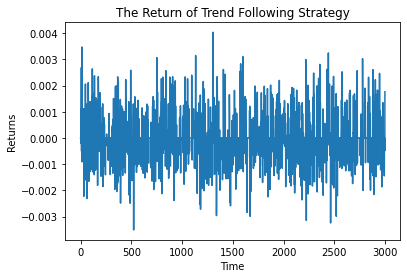

In [273]:
plt.plot(return_a_tf)
plt.title('The Return of Trend Following Strategy')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.show()

#### mean reversion

In [274]:
#mean reversion

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

%precision %.2f
return_a_mr = TV_mr[1:] / TV_mr[:-1] - 1
return_a_mr

array([0.        , 0.        , 0.        , ..., 0.00190147, 0.        ,
       0.        ])

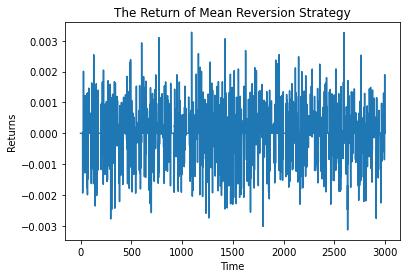

In [275]:
plt.plot(return_a_mr)
plt.title('The Return of Mean Reversion Strategy')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.show()

#### AR

In [276]:
# AR

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

%precision %.2f
return_a_ar = TV_ar[1:] / TV_ar[:-1] - 1
return_a_ar

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.00176479])

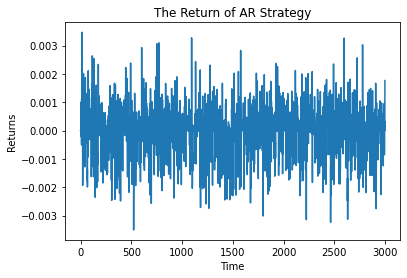

In [277]:
plt.plot(return_a_ar)
plt.title('The Return of AR Strategy')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.show()

# Q4

### TREND FOLLOWING

#### train set

In [311]:
import pandas as pd
import matplotlib.pyplot as pp
from pandas_datareader import data as pdr
import statsmodels
import statsmodels.api as sm
import warnings

warnings.simplefilter(action='ignore', category=RuntimeWarning)


# split a TV_tf into train and test sets

train_tf, test_tf = TV_tf[0:len(TV_tf)-900], TV_tf[len(TV_tf)-900:]


# return of train set
%precision %.2f
return_train_tf = train_tf[1:] / train_tf[:-1] - 1
return_train_tf

# return of test set
%precision %.2f
return_test_tf = test_tf[1:] / test_tf[:-1] - 1
return_test_tf


# Sharpe Ratio of train set
def sharpe_ratio(return_train_tf, T, rf):
    mean = return_train_tf.mean()-rf
    sigma = return_train_tf.std() / np.sqrt(T)
    return mean / sigma
    
T = 252
rf = 0 #0% risk free rate
print('The Sharpe Ratio of train set for trend following:',sharpe_ratio(return_train_tf, T, rf))




# Sortino Ratio of train set
def sortino_ratio(return_train_tf, T, rf):
    mean = return_train_tf.mean()-rf
    std_neg = return_train_tf[return_train_tf<0].std() / np.sqrt(T)
    return mean/std_neg

T = 252
rf =0 #0% risk free rate
print('The Sortino Ratio of train set for trend following:',sortino_ratio(return_train_tf, T, rf))




# Maximum Drawdown of train set
window = len(train_tf)

Roll_Max = []
Daily_Drawdown_train_tf = []
Max_Drawdown_train_tf = []
z 
for t in range(window):
    Roll_Max.append(train_tf[0:t+1].max())
    Daily_Drawdown_train_tf.append(train_tf[t]/Roll_Max[t] - 1.0)
    Max_Drawdown_train_tf.append(min(Daily_Drawdown_train_tf[0:t+1]))

print('The Maximum Drawdown of train set for trend following:',Max_Drawdown_train_tf)

The Sharpe Ratio of train set for trend following: 1.5463992693630055
The Sortino Ratio of train set for trend following: 1.8455649744116918
The Maximum Drawdown of train set for trend following: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0002091934529732109, -0.0002091934529732109, -0.0002091934529732109, -0.0002091934529732109, -0.0002091934529732109, -0.0005062136313118692, -0.0005062136313118692, -0.0005062136313118692, -0.0009135278956934334, -0.0009135278956934334, -0.0009135278956934334, -0.0009135278956934334, -0.0009135278956934334, -0.0009135278956934334, -0.0009135278956934334, -0.0009135278956934334, -0.0009135278956934334, -0.0009135278956934334, -0.0009135278956934334, -0.0009135278956934334, -0.0009135278956934334, -0.0009135278956934334, -0.0009135278956934334, -0.0009135278956934334, -0.0009135278956934334, -0.0013261791130133593, -0.0013261791130133593, -0.0013261791130133593, -0.002355437574203312, -0.002355437574203312, -0.002355437574203312, -0.002355437574203312, -0.003865

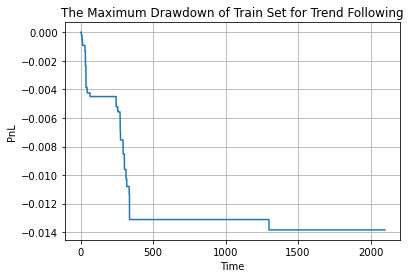

In [312]:
plt.plot(Max_Drawdown_train_tf)
plt.title('The Maximum Drawdown of Train Set for Trend Following')
plt.xlabel('Time')
plt.ylabel('PnL')
plt.grid()
plt.show()

#### test set

In [280]:
# Sharpe Ratio of test set
def sharpe_ratio(return_test_tf, T, rf):
    mean = return_test_tf.mean()-rf
    sigma = return_test_tf.std() / np.sqrt(T)
    return mean / sigma
    
T = 252
rf =0 #0% risk free rate
print('The Sharpe Ratio of test set for trend following:',sharpe_ratio(return_test_tf, T, rf))




# Sortino Ratio of test set
def sortino_ratio(return_test_tf, T, rf):
    mean = return_test_tf.mean()-rf
    std_neg = return_test_tf[return_test_tf<0].std() / np.sqrt(T)
    return mean/std_neg

T = 252
rf =0 #0% risk free rate
print('The Sortino Ratio of test set for trend following:',sortino_ratio(return_test_tf, T, rf))




# Maximum Drawdown of test set
window = len(test_tf)

Roll_Max = []
Daily_Drawdown_test_tf = []
Max_Drawdown_test_tf = []

for t in range(window):
    Roll_Max.append(test_tf[0:t+1].max())
    Daily_Drawdown_test_tf.append(test_tf[t]/Roll_Max[t] - 1.0)
    Max_Drawdown_test_tf.append(min(Daily_Drawdown_test_tf[0:t+1]))

print('The Maximum Drawdown of test set for trend following:',Max_Drawdown_test_tf)

The Sharpe Ratio of test set for trend following: 1.6530838936585392
The Sortino Ratio of test set for trend following: 1.9288842996181663
The Maximum Drawdown of test set for trend following: [0.0, -0.0011836005174816755, -0.0011836005174816755, -0.0011836005174816755, -0.0011836005174816755, -0.0011836005174816755, -0.0011836005174816755, -0.0011836005174816755, -0.0017866078929018592, -0.0017866078929018592, -0.0038812967244428176, -0.0038812967244428176, -0.0038812967244428176, -0.0038812967244428176, -0.0038812967244428176, -0.0038812967244428176, -0.004344003701026944, -0.004344003701026944, -0.004344003701026944, -0.004344003701026944, -0.004948585947256667, -0.004948585947256667, -0.004948585947256667, -0.0056203870102949915, -0.0056203870102949915, -0.0056203870102949915, -0.0056203870102949915, -0.0056203870102949915, -0.0056203870102949915, -0.0056203870102949915, -0.0056203870102949915, -0.0056203870102949915, -0.0056203870102949915, -0.0056203870102949915, -0.0056203870102

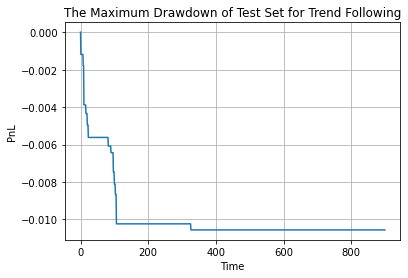

In [302]:
plt.plot(Max_Drawdown_test_tf)
plt.title('The Maximum Drawdown of Test Set for Trend Following')
plt.xlabel('Time')
plt.ylabel('PnL')
plt.grid()
plt.show()

### MEAN REVERSION 

#### train set

In [307]:
# split a TV_mr into train and test sets
train_mr, test_mr = TV_mr[0:len(TV_mr)-900], TV_mr[len(TV_mr)-900:]


# return of train set
%precision %.2f
return_train_mr = train_mr[1:] / train_mr[:-1] - 1
return_train_mr

# return of test set
%precision %.2f
return_test_mr = test_mr[1:] / test_mr[:-1] - 1
return_test_mr



# Sharpe Ratio of train set
def sharpe_ratio(return_train_mr, T, rf):
    mean = return_train_mr.mean()-rf
    sigma = return_train_mr.std() / np.sqrt(T)
    return mean / sigma
    
T = 252
rf =0 #0% risk free rate

print('The Sharpe Ratio of train set for mean reversion:',sharpe_ratio(return_train_mr, T, rf))





# Sortino Ratio of train set
def sortino_ratio(return_train_mr, T, rf):
    mean = return_train_mr.mean()-rf
    std_neg = return_train_mr[return_train_mr<0].std() / np.sqrt(T)
    return mean/std_neg

T = 252
rf =0 #0% risk free rate

print('The Sortino Ratio of train set for mean reversion:',sortino_ratio(return_train_mr, T, rf))




# Maximum Drawdown of train set
window = len(train_mr)

Roll_Max = []
Daily_Drawdown_train_mr = []
Max_Drawdown_train_mr = []


for t in range(window):
    Roll_Max.append(train_mr[0:t+1].max())
    Daily_Drawdown_train_mr.append(train_mr[t]/Roll_Max[t] - 1.0)
    Max_Drawdown_train_mr.append(min(Daily_Drawdown_train_mr[0:t+1]))


print('The Maximum Drawdown of train set for mean reversion:',Max_Drawdown_train_mr)

The Sharpe Ratio of train set for mean reversion: -1.5233081436999734
The Sortino Ratio of train set for mean reversion: -1.782202382710564
The Maximum Drawdown of train set for mean reversion: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.001935891300693604, -0.003329575424608655, -0.003329575424608655, -0.003522251847659974, -0.004274563864172687, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.004919842169198274, -0.00

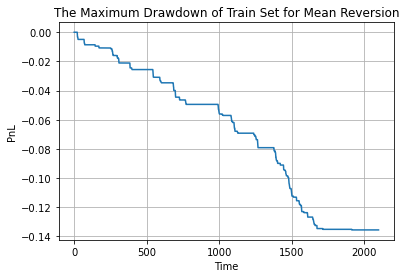

In [308]:
plt.plot(Max_Drawdown_train_mr)
plt.title('The Maximum Drawdown of Train Set for Mean Reversion')
plt.xlabel('Time')
plt.ylabel('PnL')
plt.grid()
plt.show()

#### test set

In [345]:
# Sharpe Ratio of test set
def sharpe_ratio(return_test_mr, T, rf):
    mean = return_test_mr.mean()-rf
    sigma = return_test_mr.std() / np.sqrt(T)
    return mean / sigma
    
T = 252
rf =0 #0% risk free rate

print('The Sharpe Ratio of test set for mean reversion:',sharpe_ratio(return_test_mr, T, rf))





# Sortino Ratio of test set
def sortino_ratio(return_test_mr, T, rf):
    mean = return_test_mr.mean()-rf
    std_neg = return_test_mr[return_test_mr<0].std() / np.sqrt(T)
    return mean/std_neg

T = 252
rf =0 #0% risk free rate

print('The Sortino Ratio of test set for mean reversion:',sortino_ratio(return_test_mr, T, rf))




# Maximum Drawdown of train set
window = len(test_mr)

Roll_Max = []
Daily_Drawdown_test_mr = []
Max_Drawdown_test_mr = []


for t in range(window):
    Roll_Max.append(test_mr[0:t+1].max())
    Daily_Drawdown_test_mr.append(test_mr[t]/Roll_Max[t] - 1.0)
    Max_Drawdown_test_mr.append(min(Daily_Drawdown_test_mr[0:t+1]))


print('The Maximum Drawdown of test set for mean reversion:',Max_Drawdown_test_mr)

The Sharpe Ratio of test set for mean reversion: -1.684599867345527
The Sortino Ratio of test set for mean reversion: -1.9126093810987004
The Maximum Drawdown of test set for mean reversion: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00032000687667699257, -0.0005116112953528207, -0.0005807139052731447, -0.0005807139052731447, -0.0005807139052731447, -0.0005807139052731447, -0.0005807139052731447, -0.0005807139052731447, -0.0005807139052731447, -0.0005807139052731447, -0.0005807139052731447, -0.0005807139052731447, -0.0005807139052731447, -0.0008096901991561101, -0.0020394561748448004, -0.0020759277660872266, -0.0020759277660872266, -0.0020759277660872266, -0.0020759277660872266, -0.0020759277660872266, -0.0020759277660872266, -0.0020759277660872266, -0.0020759277660872266, -0.0020759277660872266, -0.0020759277660872266, -0.0020759277660872266, -0.0020759277660872266, -0.0020759277660872266, -0.0020759277660872266, -0.0020759277660872266, -0.0020759277660872266, -0.00207

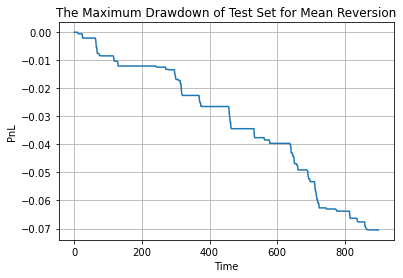

In [304]:
plt.plot(Max_Drawdown_test_mr)
plt.title('The Maximum Drawdown of Test Set for Mean Reversion')
plt.xlabel('Time')
plt.ylabel('PnL')
plt.grid()
plt.show()

### AR

#### train set

In [317]:
# split a TV_ar into train and test sets
train_ar, test_ar = TV_ar[0:len(TV_ar)-900], TV_ar[len(TV_ar)-900:]

# return of train set
%precision %.2f
return_train_ar = train_ar[1:] / train_ar[:-1] - 1
return_train_ar

# return of test set
%precision %.2f
return_test_ar = test_ar[1:] / test_ar[:-1] - 1
return_test_ar




# Sharpe Ratio of train set
def sharpe_ratio(return_train_ar, T, rf):
    mean = return_train_ar.mean()-rf
    sigma = return_train_ar.std() / np.sqrt(T)
    return mean / sigma
    
T = 252 #252 trading days in a year
rf =0 #0% risk free rate

print('The Sharpe Ratio of train set for AR:',sharpe_ratio(return_train_ar, T, rf))





# Sortino Ratio of train set
def sortino_ratio(return_train_ar, T, rf):
    mean = return_train_ar.mean()-rf
    std_neg = return_train_ar[return_train_ar<0].std() / np.sqrt(T)
    return mean/std_neg

T = 252 #252 trading days in a year
rf =0 #0% risk free rate

print('The Sortino Ratio of train set for AR:',sortino_ratio(return_train_ar, T, rf))




# Maximum Drawdown of train set
window = len(train_ar)

Roll_Max = []
Daily_Drawdown_train_ar = []
Max_Drawdown_train_ar = []


for t in range(window):
    Roll_Max.append(train_ar[0:t+1].max())
    Daily_Drawdown_train_ar.append(train_ar[t]/Roll_Max[t] - 1.0)
    Max_Drawdown_train_ar.append(min(Daily_Drawdown_train_ar[0:t+1]))


print('The Maximum Drawdown of train set for AR:',Max_Drawdown_train_ar)

The Sharpe Ratio of train set for AR: -1.8663430484527839
The Sortino Ratio of train set for AR: -2.141856194551215
The Maximum Drawdown of train set for AR: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0002091934529732109, -0.0002091934529732109, -0.0002091934529732109, -0.0002091934529732109, -0.0002091934529732109, -0.0005062136313118692, -0.0005062136313118692, -0.0005062136313118692, -0.0005062136313118692, -0.0005062136313118692, -0.0005062136313118692, -0.0005062136313118692, -0.0005062136313118692, -0.0005069500696753826, -0.0005069500696753826, -0.0005069500696753826, -0.0020426736363027276, -0.003436208650712147, -0.003436208650712147, -0.00362886445941768, -0.004381095986477512, -0.00502630525352854, -0.00502630525352854, -0.00502630525352854, -0.00502630525352854, -0.00502630525352854, -0.00502630525352854, -0.00502630525352854, -0.00502630525352854, -0.00502630525352854, -0.00502630525352854, -0.00502630525352854, -0.00502630525352854, -0.00502630525352854, -0.00502630525352854, -0.0

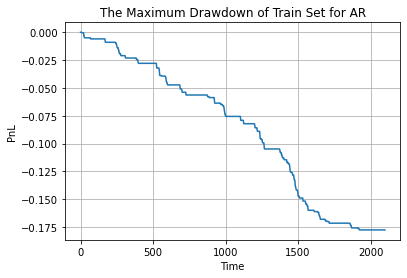

In [318]:
plt.plot(Max_Drawdown_train_ar)
plt.title('The Maximum Drawdown of Train Set for AR')
plt.xlabel('Time')
plt.ylabel('PnL')
plt.grid()
plt.show()

#### test set

In [322]:
# Sharpe Ratio of test set
def sharpe_ratio(return_test_ar, T, rf):
    mean = return_test_ar.mean()-rf
    sigma = return_test_ar.std() / np.sqrt(T)
    return mean / sigma
    
T = 252 #252 trading days in a year
rf =0 #0% risk free rate

print('The Sharpe Ratio of test set for AR:',sharpe_ratio(return_test_ar, T, rf))



# Sortino Ratio of test set
def sortino_ratio(return_test_ar, T, rf):
    mean = return_test_ar.mean()-rf
    std_neg = return_test_ar[return_test_ar<0].std() / np.sqrt(T)
    return mean/std_neg

T = 252 #252 trading days in a year
rf =0 #0% risk free rate

print('The Sortino Ratio of test set for AR:',sortino_ratio(return_test_ar, T, rf))


# Maximum Drawdown of test set
window = len(test_ar)

Roll_Max = []
Daily_Drawdown_test_ar = []
Max_Drawdown_test_ar = []


for t in range(window):
    Roll_Max.append(test_ar[0:t+1].max())
    Daily_Drawdown_test_ar.append(test_ar[t]/Roll_Max[t] - 1.0)
    Max_Drawdown_test_ar.append(min(Daily_Drawdown_test_ar[0:t+1]))


print('The Maximum Drawdown of test set for AR:',Max_Drawdown_test_ar)

The Sharpe Ratio of test set for AR: -1.7348223332696466
The Sortino Ratio of test set for AR: -1.9255559552664876
The Maximum Drawdown of test set for AR: [0.0, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0011836005174815645, -0.0014044095116494404, -0.0014044095116494404, -0.0014044095116494404, -0.0014044095116494404, -0.0021302798798432665, -0.002166748151831155, -0.002166748151831155, -0.002166748151831155, -0.002166748151831155, -0.002166748151831155, -0.002166748151831155, -0.002166748151831155, -0.002166748151831155, -0.002166748151831155, -0.002166748151831155, -0.00216

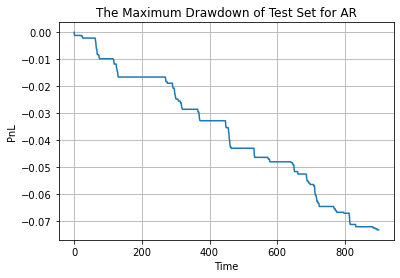

In [323]:
plt.plot(Max_Drawdown_test_ar)
plt.title('The Maximum Drawdown of Test Set for AR')
plt.xlabel('Time')
plt.ylabel('PnL')
plt.grid()
plt.show()

# Q5

#### Computing t-statistics

In [290]:
T = 252 #252 trading days in a year
rf =0
n = 3000/252 #the number of trading years


annualised_sharpe_tf = sharpe_ratio(return_a_tf, T, rf)
annualised_sharpe_mr = sharpe_ratio(return_a_mr, T, rf)
annualised_sharpe_ar = sharpe_ratio(return_a_ar, T, rf)


tf_ratio = annualised_sharpe_tf*(n**0.5)
print('The t-ratio for trend following strategy:', tf_ratio)

mr_ratio = annualised_sharpe_mr*(n**0.5)
print('The t-ratio for mean reversion strategy:', mr_ratio)

ar_ratio = annualised_sharpe_ar*(n**0.5)
print('The t-ratio for AR strategy:', ar_ratio)

The t-ratio for trend following strategy: 5.4398428657358835
The t-ratio for mean reversion strategy: -5.413841505385938
The t-ratio for AR strategy: -6.304088007467719


#### Converting t-statistics to p-values

In [342]:
import scipy


tf_pval = scipy.stats.t.sf(abs(tf_ratio),df = n - 1)
tf_pval.item()
print('The p-value of trend following strategy:', round(tf_pval.item(),5))

mr_pval = scipy.stats.t.sf(abs(mr_ratio),df = n - 1)
mr_pval.item()
print('The p-value of mean reversion strategy:', round(mr_pval.item(),5))

ar_pval = scipy.stats.t.sf(abs(ar_ratio),df = n - 1)
ar_pval.item()
print('The p-value of AR strategy:', round(ar_pval.item(),5))

The p-value of trend following strategy: 0.00011
The p-value of mean reversion strategy: 0.00011
The p-value of AR strategy: 3e-05


In [331]:
pval_df = pd.DataFrame({'Strategies':['Trend following','Mean reverting','AR'],'P-values':[round(tf_pval.item(),5),round(mr_pval.item(),5),round(ar_pval.item(),5)]
                    })
pval_df

,Strategies,P-values
0,Trend following,0.00011
1,Mean reverting,0.00011
2,AR,0.00003


#### Converting p-values to adjusted p-values

#### P-value Adjustment under FWER

In [344]:
# Bonferroni


from statsmodels.sandbox.stats.multicomp import multipletests

# Create a list of the adjusted p-values
p_adjusted_b = multipletests(pval_df['P-values'], alpha= 0.05, method='bonferroni')

# Print the adjusted p-values themselves 
print(p_adjusted_b)

(array([ True,  True,  True]), array([3.3e-04, 3.3e-04, 9.0e-05]), 0.016952427508441503, 0.016666666666666666)


In [333]:
#holm

from statsmodels.sandbox.stats.multicomp import multipletests

# Create a list of the adjusted p-values
p_adjusted_h = multipletests(pval_df['P-values'], alpha= 0.05, method='holm')

# Print the adjusted p-values themselves 
print(p_adjusted_h)

(array([ True,  True,  True]), array([2.2e-04, 2.2e-04, 9.0e-05]), 0.016952427508441503, 0.016666666666666666)


#### Converting adjusted p-values to adjusted t-statistics

In [346]:
# Bonferroni

adjusted_tstats_tf_b = scipy.stats.t.isf(3.3e-04,df = n - 1)
adjusted_tstats_mr_b = - scipy.stats.t.isf(3.3e-04,df = n - 1)
adjusted_tstats_ar_b = - scipy.stats.t.isf(9.0e-05,df = n - 1)

print('The adjusted t-statistics for trend following strategy using Bonferroni:', adjusted_tstats_tf_b)
print('The adjusted t-statistics for mean reversion strategy using Bonferroni:', adjusted_tstats_mr_b)
print('The adjusted t-statistics for AR strategy using Bonferroni:', adjusted_tstats_ar_b)

The adjusted t-statistics for trend following strategy using Bonferroni: 4.705251125993129
The adjusted t-statistics for mean reversion strategy using Bonferroni: -4.705251125993129
The adjusted t-statistics for AR strategy using Bonferroni: -5.543674742546533


In [347]:
#holm
 
adjusted_tstats_tf_h = scipy.stats.t.isf(2.2e-04,df = n - 1)
adjusted_tstats_mr_h = - scipy.stats.t.isf(2.2e-04,df = n - 1)
adjusted_tstats_ar_h = - scipy.stats.t.isf(9.0e-05,df = n - 1)

print('The adjusted t-statistics for trend following strategy using Holm:', adjusted_tstats_tf_h)
print('The adjusted t-statistics for mean reversion strategy using Holm:', adjusted_tstats_mr_h)
print('The adjusted t-statistics for AR strategy using Holm:', adjusted_tstats_ar_h)

The adjusted t-statistics for trend following strategy using Holm: 4.960099887351569
The adjusted t-statistics for mean reversion strategy using Holm: -4.960099887351569
The adjusted t-statistics for AR strategy using Holm: -5.543674742546533


#### adjusted sharpe ratio

In [336]:
# Bonferroni


adjusted_sharpe_tf_b = adjusted_tstats_tf_b / (n**0.5)
adjusted_sharpe_mr_b = adjusted_tstats_mr_b / (n**0.5)
adjusted_sharpe_ar_b = adjusted_tstats_ar_b / (n**0.5)

print('The adjusted annual sharpe ratio for trend following strategy using Bonferroni:', adjusted_sharpe_tf_b)
print('The adjusted annual sharpe ratio for mean reversion strategy using Bonferroni:', adjusted_sharpe_mr_b)
print('The adjusted annual sharpe ratio for AR strategy using Bonferroni:', adjusted_sharpe_ar_b)

The adjusted annual sharpe ratio for trend following strategy using Bonferroni: 1.3637113350439702
The adjusted annual sharpe ratio for mean reversion strategy using Bonferroni: -1.3637113350439702
The adjusted annual sharpe ratio for AR strategy using Bonferroni: -1.6067095850515312


In [337]:
#holm


adjusted_sharpe_tf_h = adjusted_tstats_tf_h / (n**0.5)
adjusted_sharpe_mr_h = adjusted_tstats_mr_h / (n**0.5)
adjusted_sharpe_ar_h = adjusted_tstats_ar_h / (n**0.5)

print('The adjusted annual sharpe ratio for trend following strategy using Holm:', adjusted_sharpe_tf_h)
print('The adjusted annual sharpe ratio for mean reversion strategy using Holm:', adjusted_sharpe_mr_h)
print('The adjusted annual sharpe ratio for AR strategy using Holm:', adjusted_sharpe_ar_h)

The adjusted annual sharpe ratio for trend following strategy using Holm: 1.4375735233268676
The adjusted annual sharpe ratio for mean reversion strategy using Holm: -1.4375735233268676
The adjusted annual sharpe ratio for AR strategy using Holm: -1.6067095850515312


#### haircut

In [338]:
# The percentage difference between the original Sharpe ratio and the new Sharpe ratio is the “haircut”.

# Bonferroni

adjustment__tf_b = (annualised_sharpe_tf - adjusted_sharpe_tf_b) * 100 / annualised_sharpe_tf
adjustment__mr_b = (annualised_sharpe_mr - adjusted_sharpe_mr_b) * 100 / annualised_sharpe_mr
adjustment__ar_b = (annualised_sharpe_ar - adjusted_sharpe_ar_b) * 100 / annualised_sharpe_ar

print('The haircut for trend following strategy using Bonferroni:', adjustment__tf_b, '%')
print('The haircut for mean reversion strategy using Bonferroni:', adjustment__mr_b, '%')
print('The haircut for AR strategy using Bonferroni:', adjustment__ar_b, '%')

The haircut for trend following strategy using Bonferroni: 13.503914687862606 %
The haircut for mean reversion strategy using Bonferroni: 13.088495085936124 %
The haircut for AR strategy using Bonferroni: 12.062224766221746 %


In [339]:
#holm

adjustment__tf_h = (annualised_sharpe_tf - adjusted_sharpe_tf_h) * 100 / annualised_sharpe_tf
adjustment__mr_h = (annualised_sharpe_mr - adjusted_sharpe_mr_h) * 100 / annualised_sharpe_mr
adjustment__ar_h = (annualised_sharpe_ar - adjusted_sharpe_ar_h) * 100 / annualised_sharpe_ar

print('The haircut for trend following strategy using Holm:', adjustment__tf_h, '%')
print('The haircut for mean reversion strategy using Holm:', adjustment__mr_h, '%')
print('The haircut for AR strategy using Holm:', adjustment__ar_h, '%')

The haircut for trend following strategy using Holm: 8.819059488024692 %
The haircut for mean reversion strategy using Holm: 8.381139669178836 %
The haircut for AR strategy using Holm: 12.062224766221746 %
